Set-up

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from statannotations.Annotator import Annotator

In [17]:
os.getcwd()
#working directory should be /Code/CodeFigure3

'/Users/emilly/Library/CloudStorage/Dropbox/UCSF Nystul Lab/NystulLabRepo/WolfgramAgingOvary/Code/CodeFigure3'

Plotting the frequency of TUNEL band on the Fas3 border in 1 vs 6 week w1118(x)

Note: You will need to run the StatsTUNELw1118.Rmd file first, or annotate out the stats code

In [24]:
csv_path = "../../Data/DataFigure3/w1118TUNELFas31v6_n.csv"
df = pd.read_csv(csv_path)

In [25]:
df['Weeks'] = df['Weeks'].map({1: '1 Week', 6: '6 Weeks'})

df['PerTUNELFas3'] = df['TUNELFas3_1v6'] *100

In [26]:
df.head(7)

,Weeks,TUNELFas3_1v6,n,N,PerTUNELFas3
0,1 Week,0.5510,49,1,55.10
1,1 Week,0.5926,27,2,59.26
2,1 Week,0.4118,34,3,41.18
3,6 Weeks,0.3636,33,1,36.36
4,6 Weeks,0.1714,35,2,17.14
5,6 Weeks,0.6667,51,3,66.67


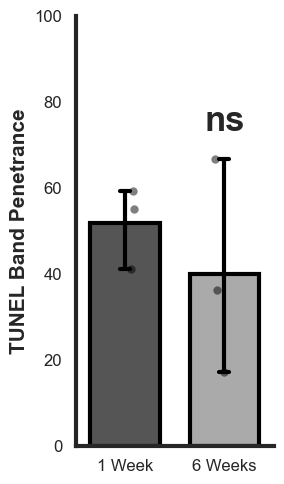

In [28]:
stats_path = "../../Results/ResultsFigure3/StatsTUNELFas31v6ttest.csv"
stats = pd.read_csv(stats_path)

stats["WeekNum"] = stats["comparison"].str.extract(r"(\d+)").astype(int)
star = stats.loc[0, "stars"]
week_to_annotate = stats.loc[0, "WeekNum"]


df["WeekNum"] = df["Weeks"].str.extract(r"(\d+)").astype(int)

week_order = sorted(df["WeekNum"].unique())
label_order = (
    df.drop_duplicates("WeekNum")
      .sort_values("WeekNum")["Weeks"]
      .tolist()
)


fig, ax = plt.subplots(figsize=(3, 5))
sns.set(style="white")

barplot = sns.barplot(
    data=df,
    x='Weeks',
    y='PerTUNELFas3',
    hue='Weeks',
    palette='gray',
    capsize=0.1,
    err_kws={'color': 'black', 'linewidth': 3},
    edgecolor="black",
    linewidth=3,
    width=0.7
)

sns.stripplot(data=df, 
              x='Weeks', 
              y='PerTUNELFas3',
              ax=ax, 
              color='black', 
              alpha=0.5,
              size=6, 
              jitter=True, 
              dodge=True
)

y_max = df.groupby("WeekNum")["PerTUNELFas3"].max()
offset = 5

x_position = week_order.index(week_to_annotate)

ax.text(
    x=x_position,
    y=y_max.loc[week_to_annotate] + offset,
    s=star,
    ha="center",
    va="bottom",
    fontsize=25,
    fontweight="bold"
)

plt.ylim(0, 100)
plt.ylabel("TUNEL Band Penetrance", fontsize=15, weight="bold")
plt.xlabel("")

ax.tick_params(width=3, labelsize=12)
ax.spines["left"].set_linewidth(3)
ax.spines["bottom"].set_linewidth(3)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

results_directory = '../../Results'
filename = os.path.join(results_directory, 'ResultsFigure3', 'TUNELFas31v6w1118.pdf')
os.makedirs(os.path.dirname(filename), exist_ok=True)
plt.savefig(
    filename,
    format='pdf',
    bbox_inches='tight'
)

plt.tight_layout()
plt.show()

Plotting the frequency of TUNEL band on the Fas3 border in 6 week in no phenotype vs phenotype

Note: You will need to run the StatsLysotrackerw1118.Rmd file first, or annotate out the stats code

In [38]:
csv_path = "../../Data/DataFigure3/w1118TUNELFas36wkNovsPheno_n.csv"
df = pd.read_csv(csv_path)

In [39]:
df['PerTUNEL6wk'] = df['TUNELFas36wk_NovsPheno'] * 100

df['Phenotype'] = df['Phenotype'].map({0: 'No Phenotype', 1: 'Phenotype'})

In [40]:
df.head(7)

,Weeks,Phenotype,TUNELFas36wk_NovsPheno,n,N,PerTUNEL6wk
0,6,Phenotype,0.3000,30,1,30.00
1,6,No Phenotype,1.0000,3,1,100.00
2,6,Phenotype,0.0800,25,2,8.00
3,6,No Phenotype,0.4000,10,2,40.00
4,6,Phenotype,0.5000,32,3,50.00
5,6,No Phenotype,0.9474,19,3,94.74


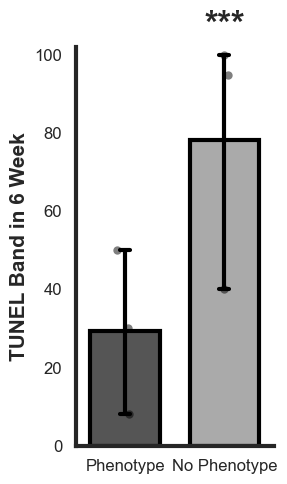

In [41]:
stats_path = "../../Results/ResultsFigure3/StatsTUNELFas36wkNovsPhenoGlmm.csv"
stats = pd.read_csv(stats_path)

star = stats.loc[0, "stars"]

fig, ax = plt.subplots(figsize=(3, 5))
sns.set(style="white")

barplot = sns.barplot(
    data=df,
    x="Phenotype",
    y="PerTUNEL6wk",
    hue="Phenotype",
    palette="gray",
    capsize=0.1,
    err_kws={"color": "black", "linewidth": 3},
    edgecolor="black",
    linewidth=3,
    width=0.7,
    ax=ax
)

sns.stripplot(
    data=df,
    x="Phenotype",
    y="PerTUNEL6wk",
    color="black",
    alpha=0.5,
    size=6,
    jitter=True,
    dodge=True,
    ax=ax
)

y_max = df["PerTUNEL6wk"].max()
offset = 3

ax.text(
    x=x_position,
    y=y_max + offset,
    s=star,
    ha="center",
    va="bottom",
    fontsize=25,
    fontweight="bold"
)

plt.ylim(0, 102)
plt.ylabel("TUNEL Band in 6 Week", fontsize=15, weight="bold")
plt.xlabel("")

ax.tick_params(width=3, labelsize=12)
ax.spines["left"].set_linewidth(3)
ax.spines["bottom"].set_linewidth(3)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

results_directory = '../../Results'
filename = os.path.join(results_directory, 'ResultsFigure3', 'TUNELFas36wkNovsPheno.pdf')
os.makedirs(os.path.dirname(filename), exist_ok=True)
plt.savefig(
    filename,
    format='pdf',
    bbox_inches='tight'
)

plt.tight_layout()
plt.show()

Plotting phenotype penetrance in no TUNEL band condition for 1 vs 6 weeks w1118

Note: You will need to run the StatsLysotrackerw1118.Rmd file first, or annotate out the stats code

In [45]:
csv_path = "../../Data/DataFigure3/w1118NoTUNELFas3PhenoPen1v6_n.csv"
df = pd.read_csv(csv_path)

In [46]:
df['Weeks'] = df['Weeks'].map({1: '1 Week', 6: '6 Weeks'})

df['PerNoBandPheno'] = df['NoTUNELFas3_Pheno1v6'] *100

In [47]:
df.head(7)

,Weeks,NoTUNELFas3_Pheno1v6,n,N,PerNoBandPheno
0,1 Week,0.3182,22,1,31.82
1,1 Week,0.4545,11,2,45.45
2,1 Week,0.2500,20,3,25.00
3,6 Weeks,1.0000,21,1,100.00
4,6 Weeks,0.7931,29,2,79.31
5,6 Weeks,0.9412,17,3,94.12


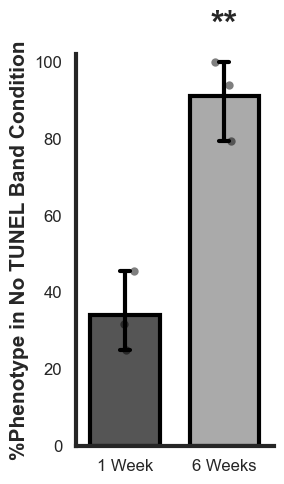

In [49]:
stats_path = "../../Results/ResultsFigure3/StatsPhenoNoTUNEL1v6ttest.csv"
stats = pd.read_csv(stats_path)

stats["WeekNum"] = stats["comparison"].str.extract(r"(\d+)").astype(int)
star = stats.loc[0, "stars"]
week_to_annotate = stats.loc[0, "WeekNum"]


df["WeekNum"] = df["Weeks"].str.extract(r"(\d+)").astype(int)

week_order = sorted(df["WeekNum"].unique())
label_order = (
    df.drop_duplicates("WeekNum")
      .sort_values("WeekNum")["Weeks"]
      .tolist()
)


fig, ax = plt.subplots(figsize=(3, 5))
sns.set(style="white")

barplot = sns.barplot(
    data=df,
    x='Weeks',
    y='PerNoBandPheno',
    hue='Weeks',
    palette='gray',
    capsize=0.1,
    err_kws={'color': 'black', 'linewidth': 3},
    edgecolor="black",
    linewidth=3,
    width=0.7
)

sns.stripplot(data=df, 
              x='Weeks', 
              y='PerNoBandPheno',
              ax=ax, 
              color='black', 
              alpha=0.5,
              size=6, 
              jitter=True, 
              dodge=True
)

y_max = df.groupby("WeekNum")["PerNoBandPheno"].max()
offset = 5

x_position = week_order.index(week_to_annotate)

ax.text(
    x=x_position,
    y=y_max.loc[week_to_annotate] + offset,
    s=star,
    ha="center",
    va="bottom",
    fontsize=25,
    fontweight="bold"
)

plt.ylim(0, 102)
plt.ylabel("%Phenotype in No TUNEL Band Condition", fontsize=15, weight="bold")
plt.xlabel("")

ax.tick_params(width=3, labelsize=12)
ax.spines["left"].set_linewidth(3)
ax.spines["bottom"].set_linewidth(3)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

results_directory = '../../Results'
filename = os.path.join(results_directory, 'ResultsFigure3', 'PhenoPenetranceNoTUNEL1v6w1118.pdf')
os.makedirs(os.path.dirname(filename), exist_ok=True)
plt.savefig(
    filename,
    format='pdf',
    bbox_inches='tight'
)

plt.tight_layout()
plt.show()